<a href="https://colab.research.google.com/github/gn0262487838/python_ipynb_ML_text/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [509]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [510]:
import pandas as pd 
traindf = pd.read_csv("/content/drive/My Drive/Colab Notebooks/titanic_data/train.csv",encoding="utf8")
traindf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [511]:
testdf = pd.read_csv("/content/drive/My Drive/Colab Notebooks/titanic_data/test.csv",encoding="utf8")
testdf.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [512]:
# isna()判斷是否為空值,True為空值,False為非空值。 sum()幫你視T為1,F視為0,並加總。
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 資料預處理

> 補缺失值
* 數值  
* ex. 平均值?、中位數?
* 類別  
* ex. 最常出現的字。





In [513]:
# median() 只會算他覺得是數值的型態，非數值不會有中位數。
med = traindf.median()
print(med)
# na
traindf = traindf.fillna(med)
print(traindf.isna().sum())

# value_counts()計算pd的Series內容出現的次數，idxmax()取得出現次數最多的內容，此例為S。
most = traindf["Embarked"].value_counts().idxmax()
traindf = traindf.fillna(most)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [514]:

# 測試資料填補不要再重算，直接用訓練資料算完的來補。
testdf = testdf.fillna(med)
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

> 資料型態處理(one hot encoding)
* 所有的sklearn都只吃數值，故須把文字轉化成數值。
* 切記!如果文字本身不會有大小關係，故轉化時要注意。
* ex. 如像詩一樣，轉成0,1,2本身不會有問題，因為是標籤。
但如果是特徵就會出現大小問題!
* 如果種類有很多很多時，看一下每種有幾個來判定能否有利用價值。

In [0]:
# 取出traindf["Embarked"]並把內容分類製成df。
dummy = pd.get_dummies(traindf["Embarked"])
# 可橫直接。
traindf = pd.concat([traindf,dummy],axis=1)
# 同理
dummy_test = pd.get_dummies(testdf["Embarked"])
testdf = pd.concat([testdf, dummy_test],axis=1)


In [516]:
# 處理比較困難的特徵。
# try 一個name。

s ="Braund, Mr. Owen Harris"
s = s.split(",")[-1].split(".")[0]
s = s.replace(" ","")
s

'Mr'

In [517]:
# 建立流程。
def titleflow(s):
    s = s.split(",")[-1].split(".")[0]
    s = s.replace(" ","")
    if s == "Miss":
        return "Miss"
    elif s =="Mr":
        return "Mr"
    elif s =="Mrs":
        return "Mrs"
    else:
        return "drop"
# 處理Name的種類。
title = traindf["Name"].apply(titleflow)
title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7      drop
8       Mrs
9       Mrs
10     Miss
11     Miss
12       Mr
13       Mr
14     Miss
15      Mrs
16     drop
17       Mr
18      Mrs
19      Mrs
20       Mr
21       Mr
22     Miss
23       Mr
24     Miss
25      Mrs
26       Mr
27       Mr
28     Miss
29       Mr
       ... 
861      Mr
862     Mrs
863    Miss
864      Mr
865     Mrs
866    Miss
867      Mr
868      Mr
869    drop
870      Mr
871     Mrs
872      Mr
873      Mr
874     Mrs
875    Miss
876      Mr
877      Mr
878      Mr
879     Mrs
880     Mrs
881      Mr
882    Miss
883      Mr
884      Mr
885     Mrs
886    drop
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [518]:
# crosstab 比較特徵，判斷資訊是否有用。
pd.crosstab(title,traindf["Survived"]).T


Name,Miss,Mr,Mrs,drop
Survived,,,,
0,55,436,26,32
1,127,81,99,35


In [519]:
# 資料製成df並drop不要的東西並連結兩個df。
dummy = pd.get_dummies(title)
dummy = dummy.drop(["drop"],axis=1)

traindf = pd.concat([traindf,dummy],axis=1)
print(traindf.head())
# 同理
title = testdf["Name"].apply(titleflow)
dummy = pd.get_dummies(title)
dummy = dummy.drop(["drop"],axis=1)
testdf = pd.concat([testdf,dummy],axis=1)
testdf.head()


   PassengerId  Survived  Pclass  ... Miss Mr  Mrs
0            1         0       3  ...    0  1    0
1            2         1       1  ...    0  0    1
2            3         1       3  ...    1  0    0
3            4         1       1  ...    0  0    1
4            5         0       3  ...    0  1    0

[5 rows x 18 columns]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,Miss,Mr,Mrs
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,0,1


In [0]:
# Sex
dummy = pd.get_dummies(traindf["Sex"])
traindf = pd.concat([traindf,dummy],axis=1)
# 同理
dummy = pd.get_dummies(testdf["Sex"])
testdf = pd.concat([testdf,dummy],axis=1)

In [521]:
# 看一下目前幾個columns
traindf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'Miss',
       'Mr', 'Mrs', 'female', 'male'],
      dtype='object')

In [522]:
# traindf 先drop，test先留著PassengerId!
drop_lis = ["PassengerId","Name","Ticket","Cabin","Embarked","Sex"]
traindf = traindf.drop(drop_lis,axis=1)
drop_lis.remove("PassengerId")
testdf = testdf.drop(drop_lis,axis=1)
print(traindf)
testdf

     Survived  Pclass   Age  SibSp  Parch  ...  Miss  Mr  Mrs  female  male
0           0       3  22.0      1      0  ...     0   1    0       0     1
1           1       1  38.0      1      0  ...     0   0    1       1     0
2           1       3  26.0      0      0  ...     1   0    0       1     0
3           1       1  35.0      1      0  ...     0   0    1       1     0
4           0       3  35.0      0      0  ...     0   1    0       0     1
5           0       3  28.0      0      0  ...     0   1    0       0     1
6           0       1  54.0      0      0  ...     0   1    0       0     1
7           0       3   2.0      3      1  ...     0   0    0       0     1
8           1       3  27.0      0      2  ...     0   0    1       1     0
9           1       2  14.0      1      0  ...     0   0    1       1     0
10          1       3   4.0      1      1  ...     1   0    0       1     0
11          1       1  58.0      0      0  ...     1   0    0       1     0
12          

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Miss,Mr,Mrs,female,male
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,893,3,47.0,1,0,7.0000,0,0,1,0,0,1,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,0,0,1,0,0,1,1,0
5,897,3,14.0,0,0,9.2250,0,0,1,0,1,0,0,1
6,898,3,30.0,0,0,7.6292,0,1,0,1,0,0,1,0
7,899,2,26.0,1,1,29.0000,0,0,1,0,1,0,0,1
8,900,3,18.0,0,0,7.2292,1,0,0,0,0,1,1,0
9,901,3,21.0,2,0,24.1500,0,0,1,0,1,0,0,1


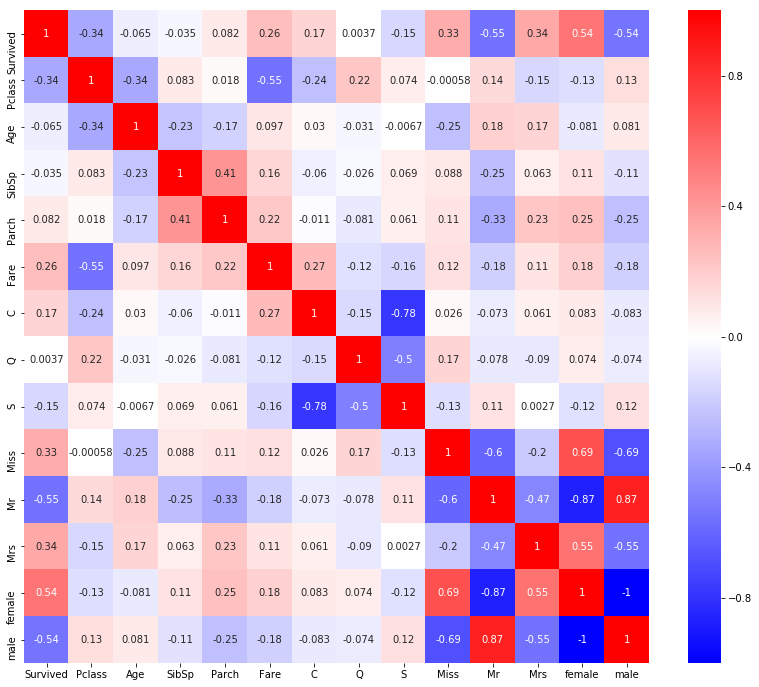

In [523]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

traindf.corr()
plt.figure(figsize=(14,12))
sns.heatmap(traindf.corr(),annot=True,cmap="bwr")

## Ensemble

### 平行組合
* 三個臭皮匠勝過一個諸葛亮概念。

> 隨機森林
* 注意!需每個module略有不同。

### 連續組合
* 逐步修正概念。

> XGboost

> Adaboost

In [524]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# n_estimators >>> 您要幾棵樹?
clf = RandomForestClassifier(max_depth=7, n_estimators=25)

trainx = traindf.drop(["Survived"],axis=1)
trainy = traindf["Survived"]
# cv >>> 切幾份?
train_result = cross_val_score(clf, trainx, trainy , cv =10)
np.average(train_result)

0.8294594824651005

In [525]:
# 暴力搜索訓練最佳解。
from sklearn.model_selection import GridSearchCV
p = {
    "max_depth":range(5,11),
    "n_estimators":range(20,30)
}
clf = RandomForestClassifier()
s = GridSearchCV(clf, p, cv=10)
s.fit(trainx, trainy)
print(s.best_params_)
print(s.best_score_)

{'max_depth': 8, 'n_estimators': 23}
0.8395061728395061


In [0]:

testx = testdf.drop(["PassengerId"],axis=1)
testy = testdf["PassengerId"]
clf = RandomForestClassifier(max_depth = 8 , n_estimators = 23)
clf.fit(trainx, trainy)
pre = clf.predict(testx)
ans = pd.DataFrame()
ans["PassengerId"] = testy
ans["Survived"] = pre
ans.to_csv("ans.csv",encoding="utf8",index=False)

In [533]:
# 回看一下模型中特徵的影響程度。
print(clf.feature_importances_)
print(trainx.columns)

[0.1059008  0.13427355 0.06454627 0.03587772 0.17270032 0.01363343
 0.01112026 0.0148464  0.02274629 0.16649049 0.01673987 0.10430411
 0.1368205 ]
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'Miss', 'Mr',
       'Mrs', 'female', 'male'],
      dtype='object')
